In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 22
%matplotlib inline

/Users/shane/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def rolling_apply(fun, a, w):
    r = np.empty(a.shape)
    r.fill(0)
    for i in range(0, a.shape[0]):
        r[i] = fun(a[(i-w+1):i+1])
    return r

In [50]:
rewards_resnet = np.load('runs/resnet/results.npy')
rewards_cnn = np.load('runs/run-cnn/results.npy')
rewards_mlp = np.load('runs/run-mlp/results.npy')

reward_list = [rewards_resnet, rewards_cnn, rewards_mlp]
labels = ['Resnet', 'CNN-mlp', 'MLP']

In [61]:
np.mean(rewards_resnet[12500-100:12500]), np.std(rewards_cnn[12500-100:12500])

(254.8748729319112, 47.255824782834232)

In [60]:
np.mean(rewards_cnn[12500-100:12500]), np.std(rewards_cnn[12500-100:12500])

(201.19973096197603, 47.255824782834232)

In [59]:
np.mean(rewards_mlp[12500-100:1250012500]), np.std(rewards_mlp[12500-100:12500])

(184.61074936880019, 75.746498004941202)

In [53]:
myopic = np.load('runs/myopic/rewards_test.npy')
myopic

array([ 280.42810831,  224.74374601,  185.06321215,  254.02795935,
        283.76655368,  272.04528686,  251.8943618 ,  229.80950328,
        277.54739847,  248.12997481,  233.04091455,  271.11113049,
        267.62317093,  216.37111742,  249.49753185,  276.71115205,
        248.0550389 ,  284.57618824,  281.87267622,  232.26800409,
        233.7519831 ,  221.78976801,  181.79146439,  278.18945419,
        266.0257166 ,  223.37924231,  277.07810179,  275.30018683,
        272.48235861,  274.61858203,  265.93334311,  270.30236689,
        254.46256132,  248.35671091,  228.50710014,  281.82920756,
        254.24476669,  263.25075959,  269.61774626,  219.97450632,
        228.74895136,  218.77715955,  256.66710415,  259.14028801,
        260.04786029,  195.05823677,  265.8891574 ,  266.27155955,
        259.43631727,  280.07749292,  276.58164054,  297.45108711,
        247.14926434,  185.26685082,  255.37585706,  218.29112486,
        258.8052116 ,  275.61067066,  220.82482647,  198.56864

In [54]:
means = [rolling_apply(np.mean, r, 100) for r in reward_list]
t = np.arange(means[0].shape[0])

/Users/shane/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shane/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


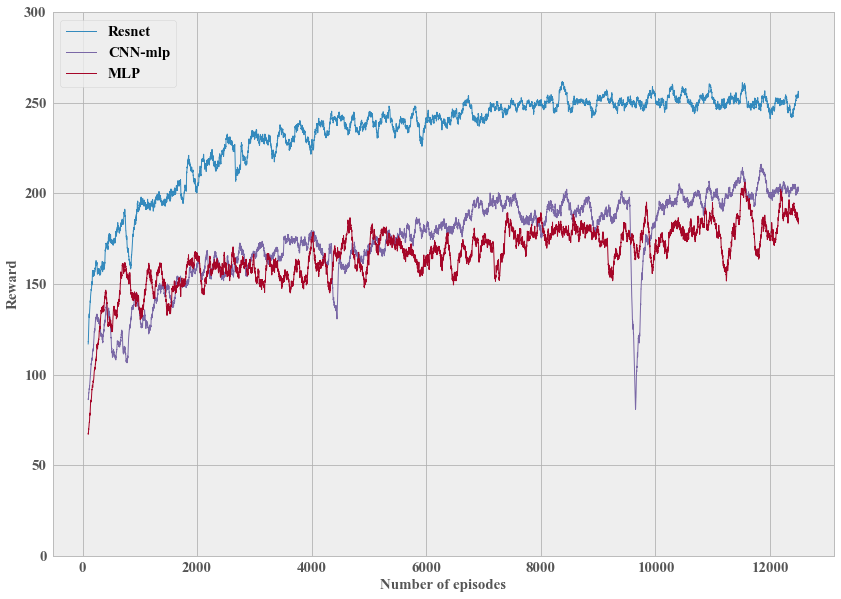

In [58]:
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.set_xlabel('Number of episodes')
ax.set_ylabel('Reward')
for i in range(len(means)):
    ax.plot(np.arange(means[i].shape[0])[:12500], means[i][:12500], label=labels[i])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.ylim(0, 300)
plt.legend(fontsize=15)
plt.savefig('paper/figs/learningcurve.pdf')

In [ ]:
np.min(meanz)